# Notebook 3
# PCA Analyses

The aim is to see what the principle components of the data set are


<div>
<img src="pose_landmarks_index.png" width="400"/>
</div>

In [ ]:
!pip install mediapipe

In [1]:
import numpy as np
#import mediapipe as mp
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import json

from pathlib import Path

import pose_ml  as pml

In [4]:
#get features
features  = pml.FEATURES
feature_descriptions = pml.FEATURE_DESCRIPTIONS

# get the actions
actions = pml.ACTIONS
action_descriptions = pml.ACTION_DESCRIPTIONS

print("Features: ")
for key, feature in feature_descriptions.items():
    print(key, feature)
print("\nActions: ")
for key, action in action_descriptions.items():
    print(key, action)



Features: 
(0, 2) nose, left eye
(0, 5) nose, right eye
(0, 7) nose, left ear
(0, 8) nose, right ear
(0, 9) nose, left mouth
(0, 10) nose, right mouth
(0, 11) nose, left shoulder
(0, 12) nose, right shoulder
(2, 5) left eye, right eye
(2, 7) left eye, left ear
(5, 8) right eye, right ear
(7, 8) left ear, right ear
(7, 9) left ear, left mouth
(7, 11) left ear, left shoulder
(8, 10) right ear, right mouth
(8, 12) right ear, right shoulder
(9, 10) left mouth, right mouth
(9, 11) left mouth, left shoulder
(10, 12) right mouth, right shoulder
(11, 12) left shoulder, right shoulder

Actions: 
C MIDDEN
TL LINKS BOVEN
TR RECHTS BOVEN
BL LINKS ONDER
BR RECHTS ONDER


### imports and subroutines

In [5]:
project_data = Path(r"./data")
graph_path = Path(r"./graphs")
model_path = Path(r"./models")
sns.set(style="whitegrid")
color = ["Blue", "Red", "Yellow", "Green", "Grey"] 
sns.set_palette(color) 
img_size = (512, 512)

In [6]:
# Load the data_set
persons, samples, labels,  raw_data= pml.read_data(project_data)
print(f"Number of samples: {len(samples)} and labels {len(labels)}")

Number of samples: 15000 and labels 15000


In [7]:
df = pd.DataFrame(samples, columns = features)
df['action_id'] =  labels
df['action'] = df['action_id'].map({0: 'C', 1: 'TL', 2: 'TR', 3: 'BL', 4: 'BR'})
pml.inspect_data(df)


,Data Type,No of Levels,Levels
"(0, 2)",float64,15000,[0.03631862 0.03642031 0.03630207 ... 0.049622...
"(0, 5)",float64,15000,[0.03282092 0.03300894 0.03299199 ... 0.033809...
"(0, 7)",float64,15000,[0.03977627 0.03985956 0.03980202 ... 0.067717...
"(0, 8)",float64,15000,[0.03224908 0.03226133 0.03215118 ... 0.024058...
"(0, 9)",float64,15000,[0.04265356 0.04265519 0.04267723 ... 0.039647...
"(0, 10)",float64,15000,[0.04109099 0.0411289 0.04117682 ... 0.035304...
"(0, 11)",float64,15000,[0.21722156 0.21690544 0.21687968 ... 0.238793...
"(0, 12)",float64,15000,[0.22302283 0.22349806 0.22487894 ... 0.199406...
"(2, 5)",float64,15000,[0.04314095 0.04323414 0.04305386 ... 0.034836...
"(2, 7)",float64,15000,[0.02173847 0.02165072 0.02160992 ... 0.037679...


# PCA Analysis

First scale the values to have 0.0 mean and 1.0 sigma:

In [9]:
for feature in features:
    df[feature] = (df[feature]-df[feature].mean())/df[feature].std(ddof=1)

Calculate the eigenvectors and eigenvalues

In [48]:
X = df[features].to_numpy().T

mean_vector = df[features].mean()
cov_matrix = df[features].cov()
var_vector = df[features].var()
eigenvalues, eigenvectors  = np.linalg.eig(cov_matrix)

print( f"Eigenvalues:\n ")
for v in eigenvalues:
    print( f"{v:.6f}")
#print( f"\nEigenvectors:\n {eigenvectors}\n")


Eigenvalues:
 
10.507471
4.012679
3.305507
0.952896
0.284978
0.219658
0.202671
0.166391
0.101310
0.072307
0.051711
0.039880
0.030513
0.022617
0.012862
0.011322
0.003878
0.001255
0.000067
0.000026


calculate the nr of principle components covering 95% of the variance

In [49]:
# calculate the nr of principle components covering 95% of the variance
total_variance = sum(eigenvalues)
explained_variance = eigenvalues / total_variance
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Total variance:{total_variance}")
print("\nExplained variance","\t","Cumulative variance")
for i,j  in zip(explained_variance,cumulative_explained_variance):
    print(f"{i:.3f}","\t\t\t", f"{j:.3f}") #explained_variance)

print(f"\nNr of components to select at >95%: {n_components}")


sns.plot(total

Total variance:19.999999999999993

Explained variance 	 Cumulative variance
0.525 			 0.525
0.201 			 0.726
0.165 			 0.891
0.048 			 0.939
0.014 			 0.953
0.011 			 0.964
0.010 			 0.974
0.008 			 0.983
0.005 			 0.988
0.004 			 0.991
0.003 			 0.994
0.002 			 0.996
0.002 			 0.997
0.001 			 0.999
0.001 			 0.999
0.001 			 1.000
0.000 			 1.000
0.000 			 1.000
0.000 			 1.000
0.000 			 1.000

Nr of components to select at >95%: 5


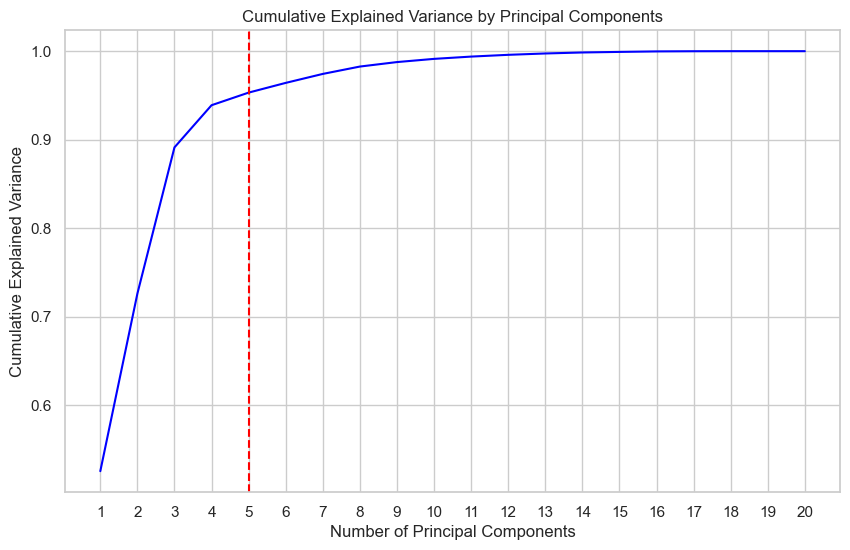

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=np.arange(len(cumulative_explained_variance)), y=cumulative_explained_variance)
plt.axvline(x=n_components - 1, color='red', linestyle='--')  # Subtract 1 because n_components is 1-indexed
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

ax.set_xticks(np.arange(len(cumulative_explained_variance)))
ax.set_xticklabels(np.arange(1, len(cumulative_explained_variance) + 1))
plt.savefig(graph_path / "cum_explained_var_PCA.png")
plt.show()